**Group number**: 2

**Group Members**: 

     Dave, Aditya                |  Project Lead	       |  100808541
     Patel, Poojan Jitendrakumar |  Project Coordinator    |  100799055
     Saleem, Rubab	           |  Project Analyst        |  100818564
     Patel, Darshit	          |  Project Architect      |  100806859
     Singh, Sachin	           |  Project Architect      |  100799069

**AIDI_1100_02_Introduction_To_AI_Development**

**Submission Date**: 12-04-2021

**Description**: Scanning and parsing website the news of previous x days, storing the same data into CSV file, fetching a stock symbol from the news data and getting 10 days of closing price and volume from finance.yahoo.com.

In [1]:
# importing padas to generate data frames
import pandas as pd
# importing numpy to modify arrays
import numpy as np
# importing Regular Expression to fetch the stock symbol pattern
import re
# importing CSV to generate CSV file of data we get from newswire website and storing stock data
import csv
# importing urllib to open connection to the news wire website and fetching data from the site
import urllib
from urllib.request import urlopen as uReq
from urllib.request import urlopen 
# importing BeautifulSoup to parse the HTML we get from newswire website
from bs4 import BeautifulSoup as soup
# importing matplotlib to visulize the data we get from finance.yahoo.com
import matplotlib.pyplot as plt

# importing custom module
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0,'/content/drive/My Drive/Final Project Module')
import newsdata


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2021-04-11 19:34:18.900286-04:00


**Fetch the stock prices and volume from finance.yahoo.com**

parameter: stock symbol

In [2]:
# Fetch the stock prices and volume from finance.yahoo.com 
# parameter: stock symbol
def fetch_stock_prices(stock_symbol):
  yahoo_url = 'https://finance.yahoo.com/quote/'+stock_symbol+'/history?p='+stock_symbol
  # adding headers to avoid 403 forbidden error
  yahoo_hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
        'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
        'Accept-Encoding': 'none',
        'Accept-Language': 'en-US,en;q=0.8',
        'Connection': 'keep-alive'}
  yahoo_UClient = uReq(urllib.request.Request(yahoo_url))
  yahoo_page = yahoo_UClient.read()
  yahoo_UClient.close()
  # parsing the data in HTML using beautiful soup
  yahoo_page_soup = soup(yahoo_page, 'html.parser')
  # collecting table of stock price and volume using CSS selector
  table_from_page = yahoo_page_soup.select('table.W(100%).M(0)')
  if len(table_from_page)>0:
    # calling the funtion to generate csv from the table
    save_to_csv(yahoo_page_soup,stock_symbol)
  else:
    print("Couldn't find the stock price table")


**defining save_to_csv to save the table into CSV file**

**parameter: yahoo_page_soup: accepts soup object**


In [3]:

try:
  def save_to_csv(yahoo_page_soup,stock_symbol):
    # empty list
    data = []

    # for getting the header from
    # the HTML file
    # generating array of headers ["Date", "Open",	"High",	"Low",	"Close*",	"Adj Close**",	"Volume"]
    list_header = []
    # try:

    # extracting table from soup
    header = yahoo_page_soup.find_all("table")[0].find("tr")

    # adding header into the list 
    for items in header:
      try:
        list_header.append(items.get_text())
      except:
        continue

    # for getting the data
    HTML_data = yahoo_page_soup.find_all("table")[0].find_all("tr")[1:]
    if len(HTML_data)>1:
      for element in HTML_data:
        
        # there is special case like "Apr 08, 2021	-	-	-	-	-	-" or " 0.44 Dividend " data not available for specific day, this if condition will handle such scenatios 
        if len(element.select("td.Py(10px).Pstart(10px)")) > 0 and ("-" in element.select("td.Py(10px).Pstart(10px)")[0] or element.select("td.Ta(c).Py(10px).Pstart(10px)")):
          continue

        # looping through sub elements
        sub_data = []
        for sub_element in element:
          try:
            sub_data.append(sub_element.get_text())
          except:
            continue
        data.append(sub_data)
        
      # Storing the data into Pandas
      # DataFrame
      # print(data)
      dataFrame = pd.DataFrame(data = data, columns = list_header)
      # Converting Pandas DataFrame
      # into CSV file
      filename_csv = stock_symbol + ".csv"
      dataFrame.head(10).to_csv(filename_csv)
      print("Created " + stock_symbol + ".csv")
      
      # some times there are 10 or lessthan 10 stock prices available so this will help to determine how much data should be collected
      if len(dataFrame) < 10:
        close_price = [float(line) for line in dataFrame.head(len(dataFrame)).get('Close*')]
        volume = [float(line.replace(",","")) for line in dataFrame.head(len(dataFrame)).get('Volume')]
        date = np.array(dataFrame.head(len(dataFrame)).get('Date'))
      elif len(dataFrame) == 10:
        close_price = [float(line) for line in dataFrame.head(len(dataFrame)-1).get('Close*')]
        volume = [float(line.replace(",","")) for line in dataFrame.head(len(dataFrame)-1).get('Volume')]
        date = np.array(dataFrame.head(len(dataFrame)-1).get('Date'))
      else:
        close_price = [float(line) for line in dataFrame.head(10).get('Close*')]
        date = np.array(dataFrame.head(10).get('Date'))
        volume = [float(line.replace(",","")) for line in dataFrame.head(10).get('Volume')]
      #Function to represent data (Create visualizations)     
      visualize_data(date,close_price,volume,stock_symbol)
      
except:
  print("Could not creat csv")


**Visualizing Data**

In [4]:

import matplotlib.pyplot as plt

# visualize_data method creates visualizations of close price and volume
def visualize_data(date,close_price,volume,stock_symbol):
  #Line chart (Price)
  width1 = 15
  height1 = 5
  width_height_1 = (width1, height1)
  plt.figure(figsize=width_height_1)
  plt.title('Closing price graph of '+stock_symbol)
  plt.plot(date, close_price , 'go--', linewidth=2)
  plt.xlabel("Date")
  plt.ylabel("Closing Price")
  plt.show()

  #Bar graph (Volume)
  width1 = 15
  height1 = 5
  width_height_1 = (width1, height1)
  plt.figure(figsize=width_height_1)
  plt.bar(date,volume)
  plt.title('Volume graph of '+stock_symbol)

  # to show the volum in text format inside the bars
  for i, v in enumerate(volume):
    plt.text(i-.25,                       # X co-ordinate
              v/volume[i]+150,            # y-coordinate
              volume[i],                  # value to be print
              fontweight='bold',  
              color="white")
  plt.xlabel('Date')
  plt.ylabel('Volume')
  plt.show()

**Storing scrapped data into CSV**

In [5]:
# to store the scrapped data into CSV file
# parameter: newsdata_dict: data dictionary
def store_scapped_data(newsdata_dict):
  df = pd.DataFrame(list(newsdata_dict.items()),columns = ['Date','News Data'])
  df.to_csv('NewsData.csv')


**Initialization of Code**

Enter how many previous days of data you want? 3
Scrapping data of 2021-04-11
Received data of 2021-04-11 !
Scrapping data of 2021-04-10
Received data of 2021-04-10 !
Scrapping data of 2021-04-09
Received data of 2021-04-09 !
2021-04-11
Found stock symbols: 
['NYSE: CS', 'NASDAQ: SRRK', 'NYSE: NMR']
Stock Prefix: 
['CS', 'SRRK', 'NMR']
2021-04-10
Found stock symbols: 
[]
Stock Prefix: 
[]
Could not find the stock symbol from the data, so by default stock of TSLA will be taken
2021-04-09
Found stock symbols: 
['NYSE: ASX', 'OSE:NEL', 'LSE: JOHN']
Stock Prefix: 
['ASX', 'NEL', 'JOHN']
[['2021-04-11', 'CS'], ['2021-04-10', 'TSLA'], ['2021-04-09', 'ASX']]
Created CS.csv


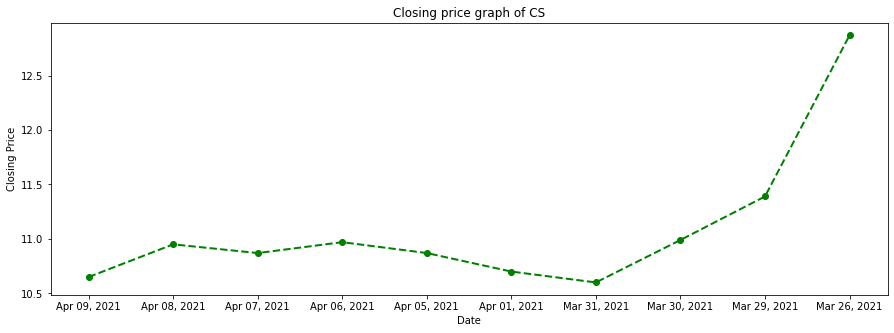

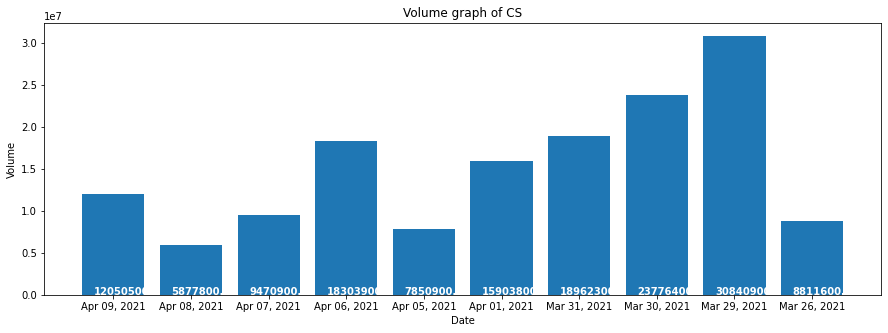

Created TSLA.csv


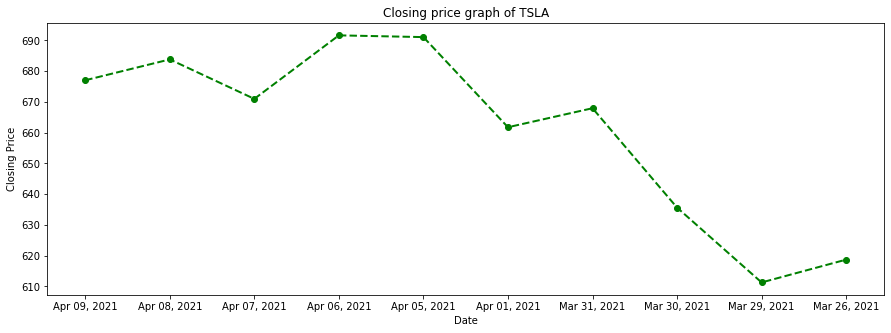

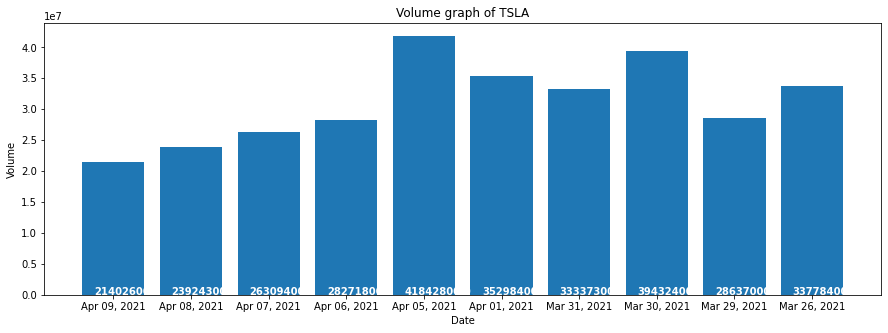

Created ASX.csv


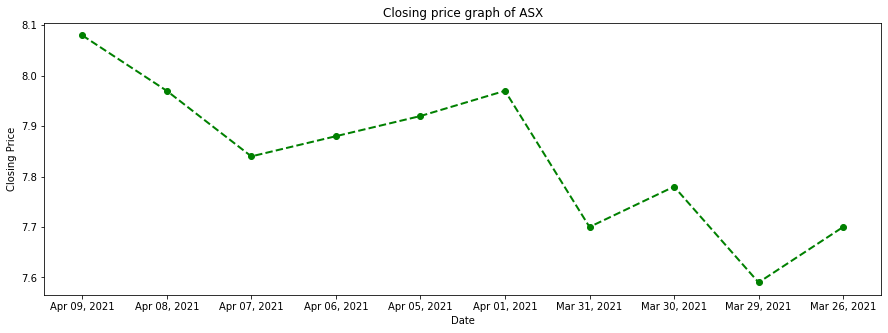

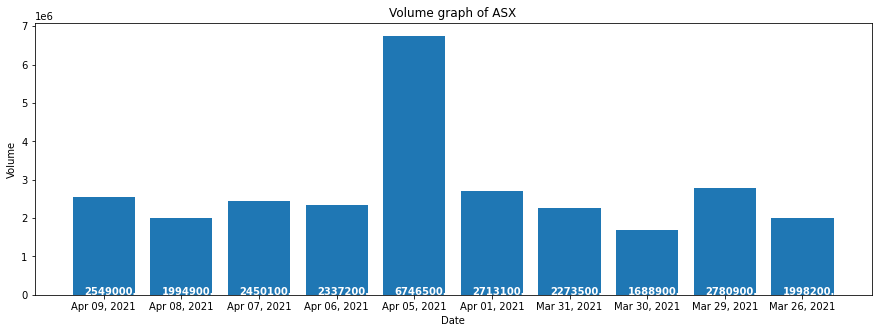

In [6]:
# asking user how many previous days of data he/she want
days_of_data = int(input("Enter how many previous days of data you want? "))
# calling a function from custom module
newsdata_dict = newsdata.getData(days_of_data)
# calling function to store the data into CSV file
store_scapped_data(newsdata_dict)

# search for stock symbol from the data we get
def search_for_stock_symbol(parsed_news_data):
  # regex searchs for the stock symbol pattern.
  # [A-Z]{2,} -> matches capital letters 2 or more
  # \s* -> matches 0 or more spaces
  # :  -> matches exact match of :
  # () -> used to group the findings
  regex = r"[A-Z]{2,}\s*:\s*([A-Z]{2,})"
  stock_symbol_postfix = []
  stock_symbols = []
  test_str = (parsed_news_data)

  matches = re.finditer(regex, test_str, re.MULTILINE)
  # looping through the number of matches we get
  for matchNum, match in enumerate(matches, start=1):
      # storing stock symbols TSX: TSLA
      stock_symbols.append(match.group())
      # looping through the groups in the match
      for groupNum in range(0, len(match.groups())):
          groupNum = groupNum + 1
          if match.group(groupNum) not in stock_symbol_postfix:
            # storing stock postfix, TSLA
            stock_symbol_postfix.append(match.group(groupNum))

  # Note: for Python 2.7 compatibility, use ur"" to prefix the regex and u"" to prefix the test string and substitution.
  print("Found stock symbols: ")
  print(stock_symbols)
  print("Stock Prefix: ")
  print(stock_symbol_postfix)
  if len(stock_symbols) == 0:
    print("Could not find the stock symbol from the data, so by default stock of TSLA will be taken")
  return (stock_symbols, stock_symbol_postfix) if len(stock_symbols) > 0 else (['TSX: TSLA'],['TSLA'])

# creating an array that stores date and stock symbol [['2021-01-02', 'TSLA'],['2021-31-01', 'AMZN']]
stocks_to_be_fetched = []
for key in newsdata_dict.keys():
  print(key)
  stocks_to_be_fetched.append([key,search_for_stock_symbol(newsdata_dict[key])[1][0]])
print(stocks_to_be_fetched)

# fetching stock prices and volume from finance.yahoo.com and generating visualization
for stock in stocks_to_be_fetched:
  fetch_stock_prices(stock[1])
